In [2]:
#Assignment No: 2
#Title: Implementing Feedforward neural networks with Keras and TensorFlow
#Name: Esha Vijay Yadav
#Rollno: 4050

In [5]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
print("[INFO] accessing MNIST...")

[INFO] accessing MNIST...


In [8]:
((trainX,trainY), (testX,testY)) = mnist.load_data()

In [9]:
trainX.shape

(60000, 28, 28)

In [10]:
trainX = trainX.reshape((trainX.shape[0], 28*28* 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

In [11]:
trainX = trainX.astype("float32") / 255.0
testX= testX.astype("float32") / 255.0

In [12]:
lb=LabelBinarizer()
trainY= lb.fit_transform(trainY)
testY = lb.transform (testY)

In [13]:
model = Sequential()

In [14]:
model.add(Dense (256, input_shape=(784,), activation="relu"))
model.add(Dense (128, activation="relu"))
model.add(Dense (64, activation="relu"))
model.add(Dense(10, activation="softmax"))

C:\Users\yadav\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
print("[INFO] training network...")
Adm = Adam(0.01)
model.compile(loss="categorical_crossentropy", optimizer = Adm, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.8688 - loss: 0.4275 - val_accuracy: 0.9588 - val_loss: 0.1417
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9613 - loss: 0.1337 - val_accuracy: 0.9632 - val_loss: 0.1348
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9706 - loss: 0.1013 - val_accuracy: 0.9638 - val_loss: 0.1322
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9762 - loss: 0.0823 - val_accuracy: 0.9596 - val_loss: 0.1607
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9766 - loss: 0.0826 - val_accuracy: 0.9722 - val_loss: 0.1238
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9790 - loss: 0.0737 - val_accuracy: 0.9705 - val_loss: 0.1260
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9811 - loss: 0.0664 - val_accuracy: 0.9719 - val_loss: 0.1185
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - a

In [22]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(i) for i in range(10)]))

[INFO] evaluating network...
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.92      0.98      0.95      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



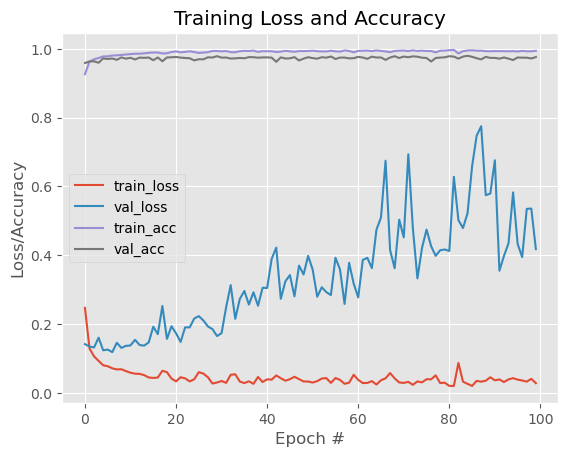

In [23]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()